### open json file with all results and csv with standard deviations

In [2]:
import numpy as np
import json
import cv2
import pandas as pd
from scipy import ndimage
import matplotlib.pylab as plt
import ast
import os

In [3]:
import pandas as pd
import json
path = "all_first_move_tests.json"
# path = "/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/notebooks_data/all_first_move_tests.json"
with open(path, "r") as infile:
    dic = json.load(infile)
print(dic.keys())
#df = pd.read_csv("first_move_evaluation.csv")
#print(df.columns.tolist())
#print(df["Unnamed: 0"])

dict_keys(['every_2', 'position', 'every_4', '3_refined', 'label', 'every_5', 'every_3', '3_refined_nograd', 'release'])


['k=2', 'k=4', 'Statcast', 'k=5', 'k=3', 'k=3 refined']
('Statcast', 'k=2', 'k=3', 'k=3 refined', 'k=4', 'k=5') (2, 0, 4, 5, 1, 3)


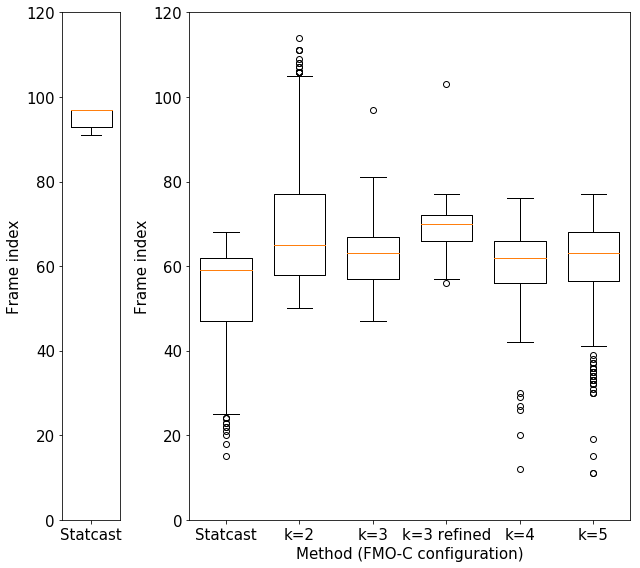

In [4]:
import pandas as pd
# path = "all_first_move_tests.json"
#path = "/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/3_Event_detection/all_first_move_tests.json"
#with open(path, "r") as infile:
 #   dic = json.load(infile)
#print(dic.keys())

plt.figure(figsize=(9,8))
# gs = gridspec_kw = {'width_ratios':[1, 5]}
import matplotlib.gridspec as gridspec
gs = gridspec.GridSpec(1, 5)
plt.subplot(gs[0,0])
plt.boxplot(dic["release"], positions= [0], widths=(0.7))
plt.xticks([0], ["Statcast"], fontsize=15)
plt.yticks(fontsize=15)
    # plt.title(lab)
plt.ylabel("Frame index", fontsize=15)
# plt.title("Release frame", fontsize=15)
plt.ylim(0,120)
    # i+=1
# plt.show()
plt.subplot(gs[0,1:])
i=0
liste=[]
l2=[]
for key in dic.keys():
    if "every" in key:
        lab = "k="+key[-1]
    elif key=="label":
        lab = "Statcast"
    elif key=="release":
        continue
        lab = "release frame"
    elif key=="3_refined_nograd":
        lab = "k=3 refined"
    else:
        continue
    # plt.subplot(1, len(dic.keys())-1,i+1)
    l2.append(lab)
    liste.append(dic[key])
print(l2)
from operator import itemgetter
inds, l2 = zip(*sorted(enumerate(l2), key=itemgetter(1)))
# print(list(L_sorted)
# inds = np.argsort(l2)
print(l2, inds)
new_list = []
for i in inds:
    new_list.append(liste[i])
#liste = np.array(liste)[inds]
liste = new_list
# l2=l2[inds]
plt.boxplot(liste, positions=np.arange(len(liste)), widths=tuple([0.7 for _ in range(len(liste))]))
plt.xticks(range(0, len(l2), 1), l2, fontsize=15)
plt.yticks(fontsize=15)
    # plt.title(lab)
plt.ylabel("Frame index", fontsize=15)
plt.ylim(0,120)
# plt.title("Pitcher's first movement", fontsize=15)
    # i+=1
plt.xlabel("Method (FMO-C configuration)", fontsize=15)
plt.tight_layout()
plt.savefig("/Users/ninawiedemann/Desktop/BA/boxplots")
plt.show()

In [ ]:
for i in range(7):
    for j in range(275):
        new[i,j] = float(new[i,j])

#dic = {"release": new[0].tolist(), "label": new[1].tolist(), "every_2":new[2].tolist(), "every_3":new[3].tolist(), "every_4":new[4].tolist(), "every_5":new[5].tolist(), "3_refined":new[6].tolist()}
dic["position"] = position[:275]
with open("all_first_move_tests.json", "w") as outfile:
    json.dump(dic, outfile)

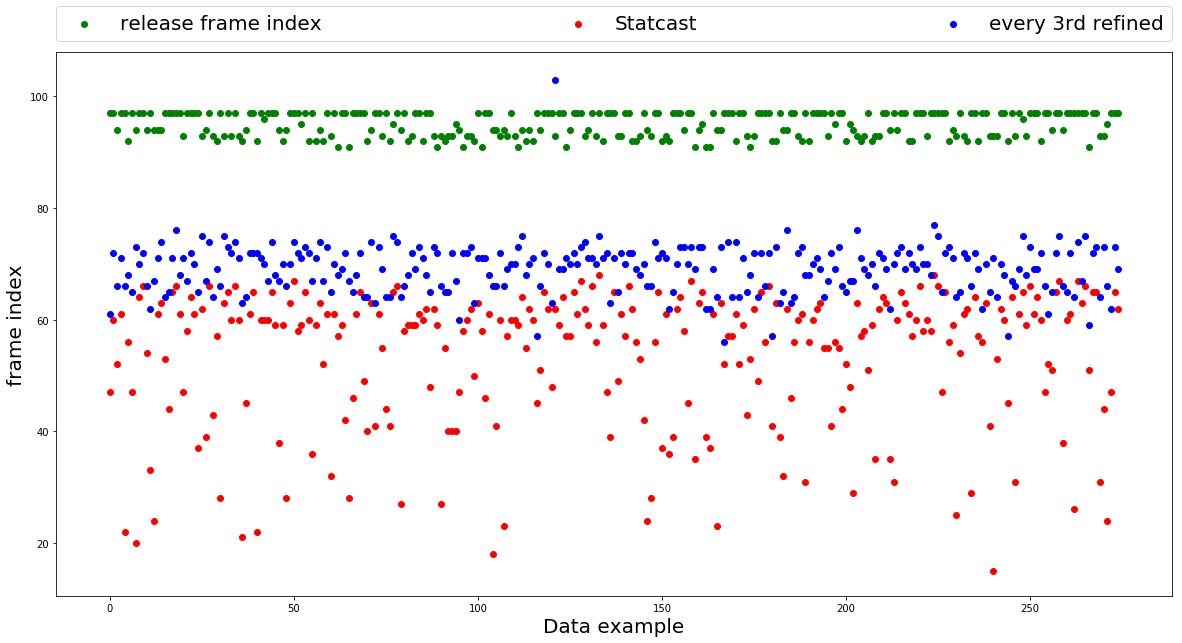

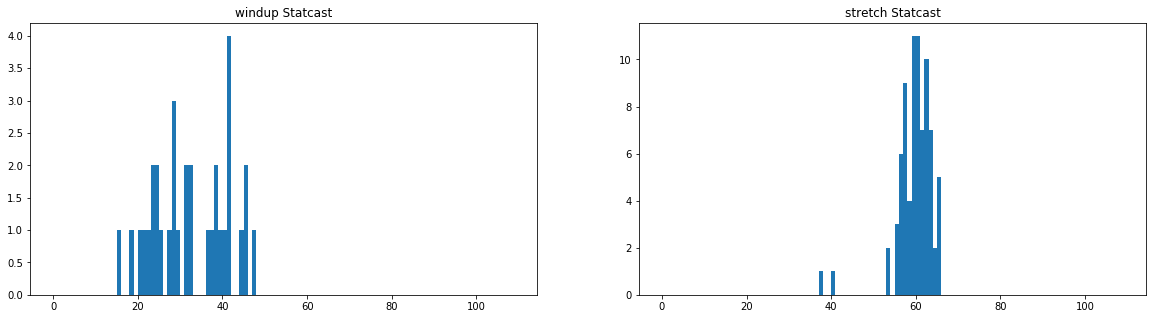

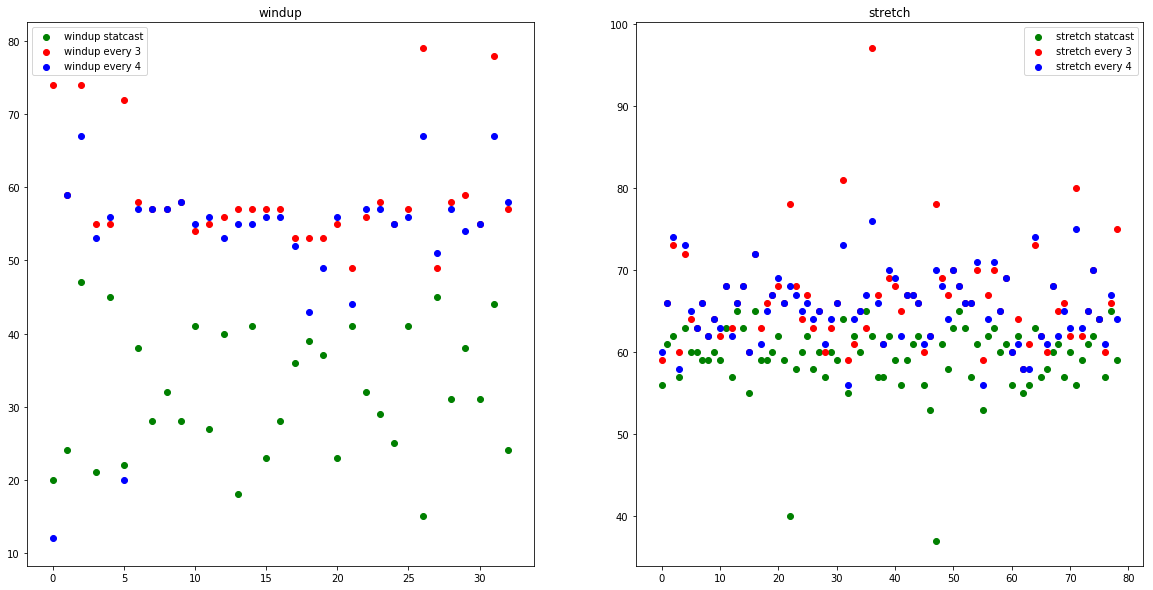

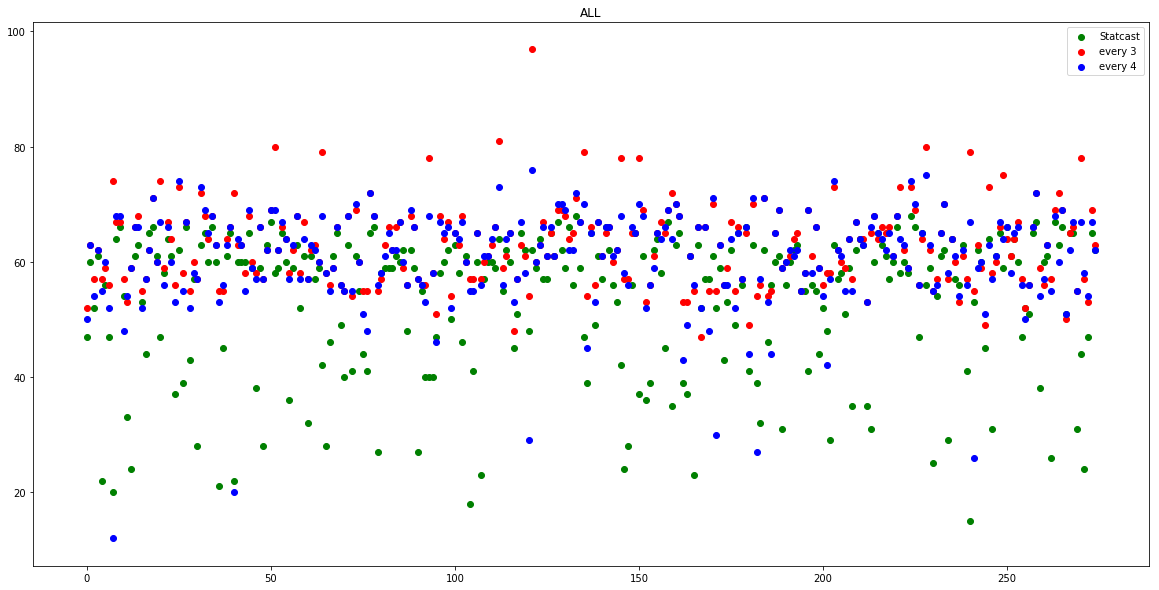

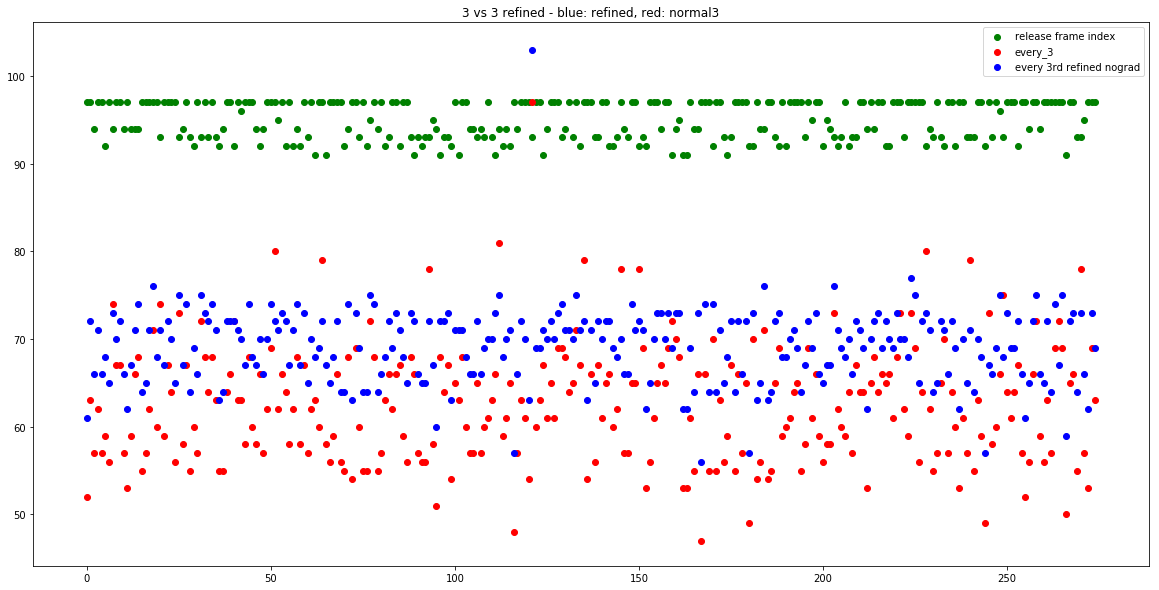

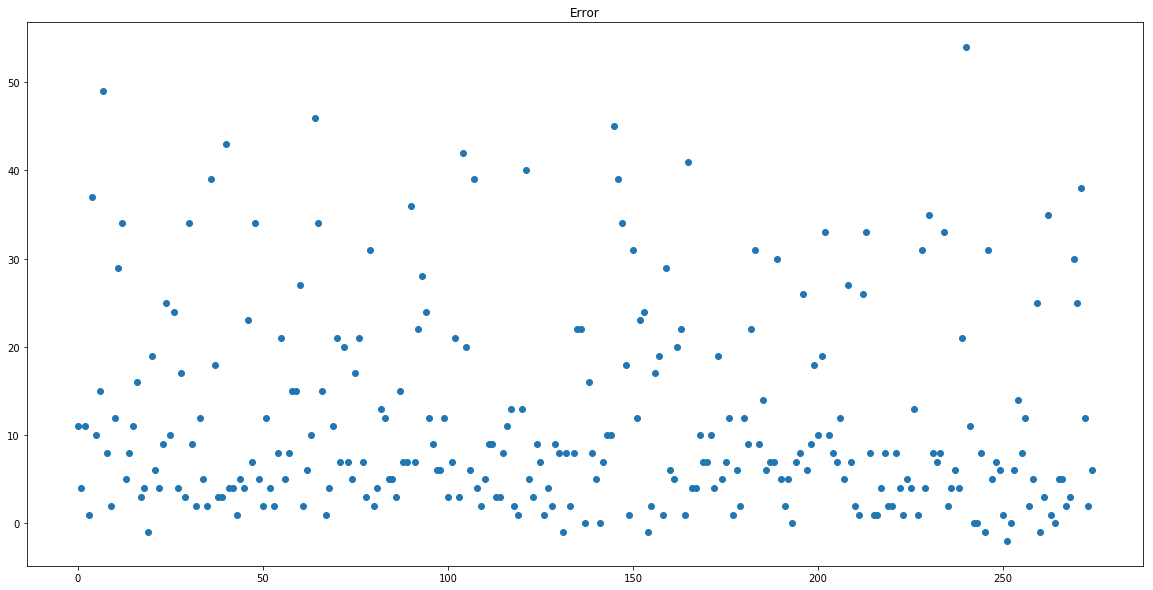

Mean error 11.64


In [12]:
# print(np.array(outputs).shape)
# new = np.array(outputs)[:, 0, :]
#new = np.append(np.array([outputs[0][1], outputs[0][2]]), np.array(new), axis = 0)
def scatter_plot(l, plotting_labels):
    plt.scatter(np.arange(len(l[0])),l[0], label = plotting_labels[0], c = "green")
    plt.scatter(np.arange(len(l[0])), l[1], label = plotting_labels[1], c = "red")
    plt.scatter(np.arange(len(l[0])), l[2], label = plotting_labels[2], c="blue")


# COMPARE labels and 3 refined_nograd:
fig = plt.figure(figsize = (20,10))
scatter_plot([dic["release"], dic["label"], dic["3_refined_nograd"]], ["release frame index", "Statcast", "every 3rd refined"])
# plt.title("label vs 3 refined - blue: refined, red: label")
plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3,
           ncol=3, mode="expand", borderaxespad=0., fontsize=20)
plt.xlabel("Data example", fontsize=20)
plt.ylabel("frame index", fontsize=20)
plt.show()


# SHOW LABELS SEPERATED BY WINDUP AND STRETCH
inds = np.where(np.array(dic["position"])=="Windup")[0]
inds_st = np.where(np.array(dic["position"])=="Stretch")[0]
vals_wind = np.array(dic["label"])[inds]
vals_stretch = np.array(dic["label"])[inds_st]

plt.figure(figsize=(20,5))
plt.subplot(1,2,1)
plt.hist(vals_wind, bins= np.arange(0, 110))
plt.title("windup Statcast")
plt.subplot(1,2,2)
plt.hist(vals_stretch, bins= np.arange(0, 110))
plt.title("stretch Statcast")
plt.show()

# WINDUP
every_3_wind = np.array(dic["every_3"])[inds]
every_4_wind =  np.array(dic["every_4"])[inds]
fig = plt.figure(figsize = (20,10))
# plt.style.use('ggplot')
plt.subplot(1,2,1)
scatter_plot([vals_wind, every_3_wind, every_4_wind], ["windup statcast", "windup every 3", "windup every 4"])
plt.title("windup")
plt.legend()
# plt.show()

# STRETCH
every_3_set = np.array(dic["every_3"])[inds_st]
every_4_set =  np.array(dic["every_4"])[inds_st]
# plt.style.use('ggplot')
plt.subplot(1,2,2)
scatter_plot([vals_stretch, every_3_set, every_4_set], ["stretch statcast", "stretch every 3", "stretch every 4"])
plt.title("stretch")
plt.legend()
plt.show()

# ALL
fig = plt.figure(figsize = (20,10))
# plt.style.use('ggplot')
scatter_plot([dic["label"], dic["every_3"], dic["every_4"]], ["Statcast", "every 3", "every 4"])
plt.legend()
plt.title("ALL")
plt.legend()
plt.show()
#plt.grid(True)
#from matplotlib2tikz import save as tikz_save
#tikz_save('test.tex')

# COMPARE 3 and 3 refined_nograd:
fig = plt.figure(figsize = (20,10))
scatter_plot([dic["release"], dic["every_3"], dic["3_refined_nograd"]], ["release frame index", "every_3", "every 3rd refined nograd"])
plt.title("3 vs 3 refined - blue: refined, red: normal3")
plt.legend()
plt.show()



# DIFFERENCE FROM EACH OTHER
fig = plt.figure(figsize = (20,10))
label_error = np.array(dic["3_refined"])-np.array(dic["label"])
plt.scatter(np.arange(0,len(label_error),1), label_error)
plt.title("Error")
plt.show()
print("Mean error", np.mean(label_error))

### save recent output in dictionary

In [ ]:
a = detected_first_move.copy()
b = label_release_frame.copy()[:-1]
c = label_first_move.copy()
print(len(a),len(b),len(c))
assert(c==dic["label"])
d = np.array([a,b,c])
print(d.shape)

np.save("first_move_outputs_every_3_ref_without_gradient.npy", a)

dic["3_refined_nograd"]= np.array(a).astype(np.float32).tolist()
with open("all_first_move_tests.json", "w") as outfile:
    json.dump(dic, outfile)

### histograms of dictionary

In [ ]:
for i in list(dic.keys()):
    plt.hist(dic[i], bins=np.arange(120))
    plt.title(i)
    plt.show()

### form csv with standard deviations and outliers

In [ ]:
new_column = "3_refined_nograd"
new_column_values = dic[new_column]
a = np.round(np.mean(new_column_values),3)
b = np.round(np.std(new_column_values),3)
c = np.sum(np.absolute(new_column_values-np.mean(new_column_values)) > 3*b)/275
d = np.sum(np.absolute(new_column_values-np.mean(new_column_values)) > 2*b)/275
e = np.sum(np.absolute(new_column_values-np.mean(new_column_values)) > 1*b)/275
l = [e,d,c,b,a]
print(l)
d = pd.Series(l)
df["every_3_refined"]=d
print(df)
df.to_csv("first_move_evaluation.csv")

In [ ]:
# dic = {"every_2":[], "every_3":[], "every_4":[], "every_5":[], "label":[]}
#with open("all_first_move_tests.json", "r") as infile:
#    dic = json.load(infile)
dic["every_3_refined"] = dic.pop("3_refined_nograd")
dic_new = {}
for d in list(dic.keys()):
    if d=="release" or d== "position" or d=="3_refined":
        continue
    print(d)
    # rel_detect = np.array(d[1]-d[0])
    rel_detect = np.asarray(dic[d])
    mean = np.mean(rel_detect)
    std = np.std(rel_detect)
    more_than_2std = np.sum(np.absolute(rel_detect-np.mean(rel_detect))> 2*std)/len(rel_detect)
    more_than_3std = np.sum(np.absolute(rel_detect-np.mean(rel_detect))> 3*std)/len(rel_detect)
    #print(more_than_2std)
    # print(np.sum(more_than_2std))
    dic_new[d] = [mean, std, more_than_2std, more_than_3std]
    print(d, dic_new[d])

#d = outputs[1]
#rel_lab = np.array(d[1]-d[2])
#std_2 = np.std(rel_lab)
#more_than_2std_2 = np.absolute(rel_lab-np.mean(rel_lab))> 3*std_2
#print(np.sum(more_than_2std_2))
#dic["label"].append(np.mean(rel_lab))

# print(dic)

In [ ]:
"""
for key in dic_new.keys():
    new = []
    for i in range(len(dic_new[key])):
        new.append(round(dic_new[key][i], 4))
    dic_new[key] = new
    print(new)
print(dic_new)
"""
df = pd.DataFrame.from_dict(dic_new)
df = df.round(2)
df = df.rename(index = {0: "mean", 1:"std",2: "percentage >2*std", 3: "percentage >3*std" })
df = df.rename(columns = {"3_refined_nograd": "every_3_refined"})
print(df.columns.tolist())
df.to_csv("first_move_evaluation.csv")
#with open("dic_with_first_move_evaluation.json", "w") as outfile:
 #   json.dump(dic, outfile)

### For position and gradient retrieval

In [ ]:
arr = np.array(outputs[2])
j=0
#old = pd.read_csv("/Users/ninawiedemann/Desktop/UNI/Praktikum/ALL/cf_data_cut.csv")
cf_list = old["Pitching Position (P)"].values
print(cf_list)
position  = []
cf_play_list = old["play_id"].values.tolist()
refined = []
for bsp in (os.listdir(path)):
    if bsp[-4:]!=".mp4":
        continue
    BASE = path+ bsp # "/Volumes/Nina Backup/CENTERFIELD bsp videos/3d69a818-568e-4eef-9d63-24687477e7ee.mp4" # minarea 50
    # print(bsp)
    joints_path = "/Volumes/Nina Backup/outputs/new_videos/cf/490770_"+ bsp[:-4] + "_pitcher.json" #3d69a818-568e-4eef-9d63-24687477e7ee_pitcher.json"
    if not os.path.exists(joints_path):
        print("file existiert nicht", joints_path)
        continue
    joints = from_json(joints_path)[:,:12,:]
    # print(joints.shape)
    
    #print(bsp, cf_play_list)
    if bsp[:-4] in cf_play_list:
        position.append(cf_list[cf_play_list.index(bsp[:-4])])
        # print(pos)
    else: 
        position.append("Unknown")
    continue
    
    for i in open(BASE+".dat").readlines():
        datContent=ast.literal_eval(i)
    rel_frame = datContent["pitch_frame_index"]
    label_first_move = datContent["first_movement_frame_index"]

    assert(rel_frame == arr[1,j])
    assert(label_first_move == arr[2,j])
    first_move_frame = arr[0,j]
    range_joints = joints[first_move_frame -10: first_move_frame +10]
    grad = np.gradient(range_joints, axis = 0)
    plt.plot(grad[:,:,1])
    #plt.show()
    mean_gradient = np.mean(grad[:, [7,8,10,11],1], axis = 1)
    plt.plot(mean_gradient, c = "black")
    plt.show()
    print("previous", first_move_frame, "new", first_move_frame-10+np.argmin(mean_gradient))
    refined.append(first_move_frame-10+np.argmin(mean_gradient))
    j+=1
    
print(position, len(position))

In [5]:
a = [1,2,3,4,5]
import numpy as np
b = np.mean(np.array([]))
print(np.argmin(b))

0


/Users/ninawiedemann/anaconda/lib/python3.5/site-packages/numpy/core/fromnumeric.py:2909: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/ninawiedemann/anaconda/lib/python3.5/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
